In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
# Importing data
mat = loadmat('ex5data1.mat')

In [5]:
X = mat['X']
y = mat['y']
Xtest = mat['Xtest']
ytest = mat['ytest']
Xval = mat['Xval']
yval = mat['yval']

In [67]:
print('X size: ',X.shape,', y size: ',y.shape,', Xval size: ',Xval.shape,', yval size: ',yval.shape)

X size:  (12, 1) , y size:  (12, 1) , Xval size:  (21, 1) , yval size:  (21, 1)


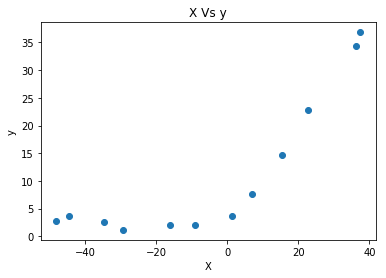

In [7]:
# Plotting Training data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X Vs y')
plt.show()

In [180]:
# Computing Cost Function of Linear Regression
def computeCost(X, y, theta, lamda):
    
    m = len(y)
    X = np.hstack((np.ones((m,1)),X))
    
    # Compute Cost
    #print('X:',X.shape,', theta',theta.shape)
    predictions = X@theta
    error2 = sum((predictions-y)**2)
    cost = (1/(2*m)) * error2
    reg_cost = cost + (lamda/(2*m))*sum(theta[1:]**2)
    
    grad_0 = (1/m)*(X.T@(predictions-y))
    grad_1 = grad_0 + (lamda/m)*(theta)
    grad = np.vstack((grad_0[0], grad_1[1:]))
    
    return cost, reg_cost, grad

In [81]:
m, n = X.shape
theta = np.zeros((n+1,1))
cost, reg_cost, grad = computeCost(X, y, theta, 1)

In [82]:
print('Cost: ',cost,', grad: ',grad.shape)

Cost:  [140.95412088] , grad:  (2, 1)


In [83]:
# Computing Gradient Descent for Linear Regression
def gradientDescent(X, y, theta, alpha, lamda, num_iterations):
    
    m = len(y)
    j_history = []
    
    # Computing Gradient Descent
    for i in range(num_iterations):
        
        cost, reg_cost, grad = computeCost(X, y, theta, lamda)
        theta = theta - (alpha*grad)
        j_history.append(cost)
        
    return theta, j_history

In [84]:
m, n = X.shape
thata = np.zeros((n+1,1))
thata_final, j_history = gradientDescent(X, y, thata, 0.001, 0, 4000)

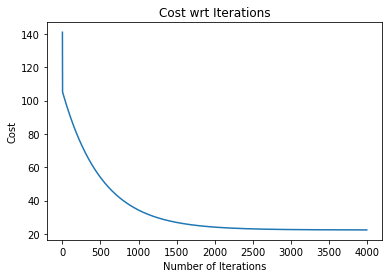

In [85]:
# Plotting Cost Ficntion
plt.plot(j_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost wrt Iterations')
plt.show()

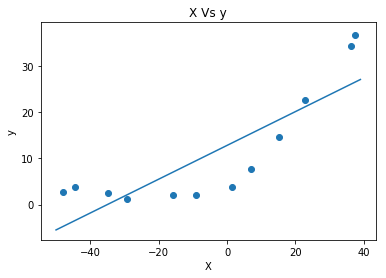

In [86]:
# Fitting the Linear Regression line on traing Data
X_values = [X for X in range(-50,40)]
y_values = [(y*thata_final[1]+thata_final[0]) for y in X_values]
plt.plot(X_values, y_values)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('X Vs y')
plt.show()

In [97]:
# Learning Curve
def learningCurve(X, y, Xval, yval, theta):
    
    m, n = X.shape
    train_error = []
    val_error = []
        
    for i in range(1,m+1):
        theta = gradientDescent(X[:i,:], y[:i,:], theta, 0.001, 0, 3000)[0]        
        train_error.append(computeCost(X[:i,:], y[:i,:], theta, 0)[0])
        val_error.append(computeCost(Xval, yval, theta, 0)[0])
        
    return train_error, val_error

In [98]:
m, n = X.shape
theta = np.zeros((n+1,1))
train_error, val_error = learningCurve(X, y, Xval, yval, thata)

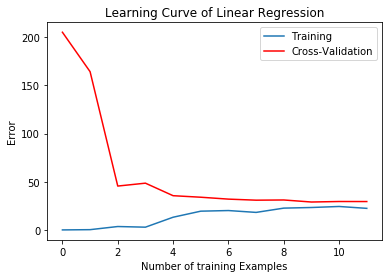

In [101]:
# Plotting Learning Curve
plt.plot(range(12), train_error, label='Training')
plt.plot(range(12), val_error, label='Cross-Validation', c='r')
plt.xlabel('Number of training Examples')
plt.ylabel('Error')
plt.title('Learning Curve of Linear Regression')
plt.legend()
plt.show()

In [172]:
# Polynomial Degree Selection
from sklearn.preprocessing import StandardScaler
def polynomialDegree(X, p):
    
    m = len(X)
    
    # Create the Polynomial Degree
    for i in range(2,p+1):
        X = np.hstack((X,X[:,0][:,np.newaxis]**i))
    
    # Feature Scaling
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)
    
    return X_sc

In [194]:
def learnigCurveDegree(X, y, Xval, yval, p):
    
    train_error = []
    cross_error = []
    
    for i in range(2, p+1):
        X_poly = polynomialDegree(X,i)
        Xval_poly = polynomialDegree(Xval,i)
        theta = gradientDescent(X_poly, y, np.zeros((X_poly.shape[1]+1,1)), 0.0001, 0, 3000)[0]
        train_error.append(computeCost(X_poly, y, theta,0)[0])
        cross_error.append(computeCost(Xval_poly, yval, theta,0)[0])
        
    return train_error, cross_error
        

In [201]:
train_error, cross_error = learnigCurveDegree(X, y, Xval, yval, 12)

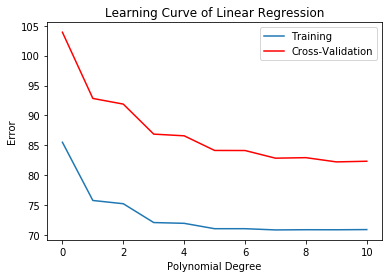

In [202]:
# Ploting Learning Curve for Plynomial Degree
plt.plot(range(11), train_error, label='Training')
plt.plot(range(11), cross_error, label='Cross-Validation', c='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Learning Curve of Linear Regression')
plt.legend()
plt.show()

In [288]:
# Linear Regression for Lamda Selection
def learningCurveLamdaSelection(X, y, Xval, yval,):
    
    m, n = X.shape
    train_error = []
    cv_error = []
    lamda_vec = [0.003, 0.03, 0.3, 3, 7, 10, 13, 16, 18, 21, 24, 27, 30]
    theta = np.zeros((n+1,1))
    for i in range(len(lamda_vec)):
        
        theta = gradientDescent(X, y, theta, 0.0001,lamda_vec[i], 3000)[0]
        train_error.append(computeCost(X, y, theta,0)[0])
        cv_error.append(computeCost(Xval, yval, theta,0)[0])
                
    return train_error, cv_error

In [289]:
train_error, cross_error = learningCurveLamdaSelection(X, y, Xval, yval)
print(train_error)

[array([68.79843533]), array([48.32204224]), array([36.87720271]), array([30.48078371]), array([26.90605192]), array([24.9081164]), array([23.79141216]), array([23.16720591]), array([22.81818702]), array([22.6230562]), array([22.51393275]), array([22.4528917]), array([22.41873893])]


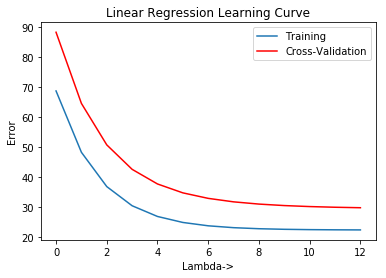

In [290]:
# Ploting Learning Curve for Plynomial Degree
plt.plot(range(13), train_error, label='Training')
plt.plot(range(13), cross_error, label='Cross-Validation', c='r')
plt.xlabel('Lambda->')
plt.ylabel('Error')
plt.title('Linear Regression Learning Curve')
plt.legend()
plt.show()